In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/.dependencies/pyplot-perso")
from plttools import PltTools
path_figures = current_path # git_path + "/figures/"
path_data = git_path + "/.dependencies/lammpstutorials-inputs/"+path_in_folder.split('/')[-2]+"/"

In [4]:
color0_light = np.array([0.5, 0.5, 0.5])
color1_light = np.array([1, 0.682, 0.286])
color2_light = np.array([0.008, 0.294, 0.478])
color3_light = np.array([0.267, 0.647, 0.761])

color0_dark = np.array([0.5, 0.5, 0.5])
color1_dark = np.array([1, 0.8, 0.5])
color2_dark = np.array([0.24, 0.58, 1.0])
color3_dark = np.array([0.4, 0.75, 0.85])

colors_light = {
    "color0": color0_light,
    "color1": color1_light,
    "color2": color2_light,
    "color3": color3_light,
}

colors_dark = {
    "color0": color0_dark,
    "color1": color1_dark,
    "color2": color2_dark,
    "color3": color3_dark,
}

In [5]:
log = lammps_logfile.File(path_data + "gcmc.log")
timestep = 1

time, vol, dens, temp = [], [], [], []
time = log.get("Step")*timestep/1000 # ps
n0 = log.get("v_nO")

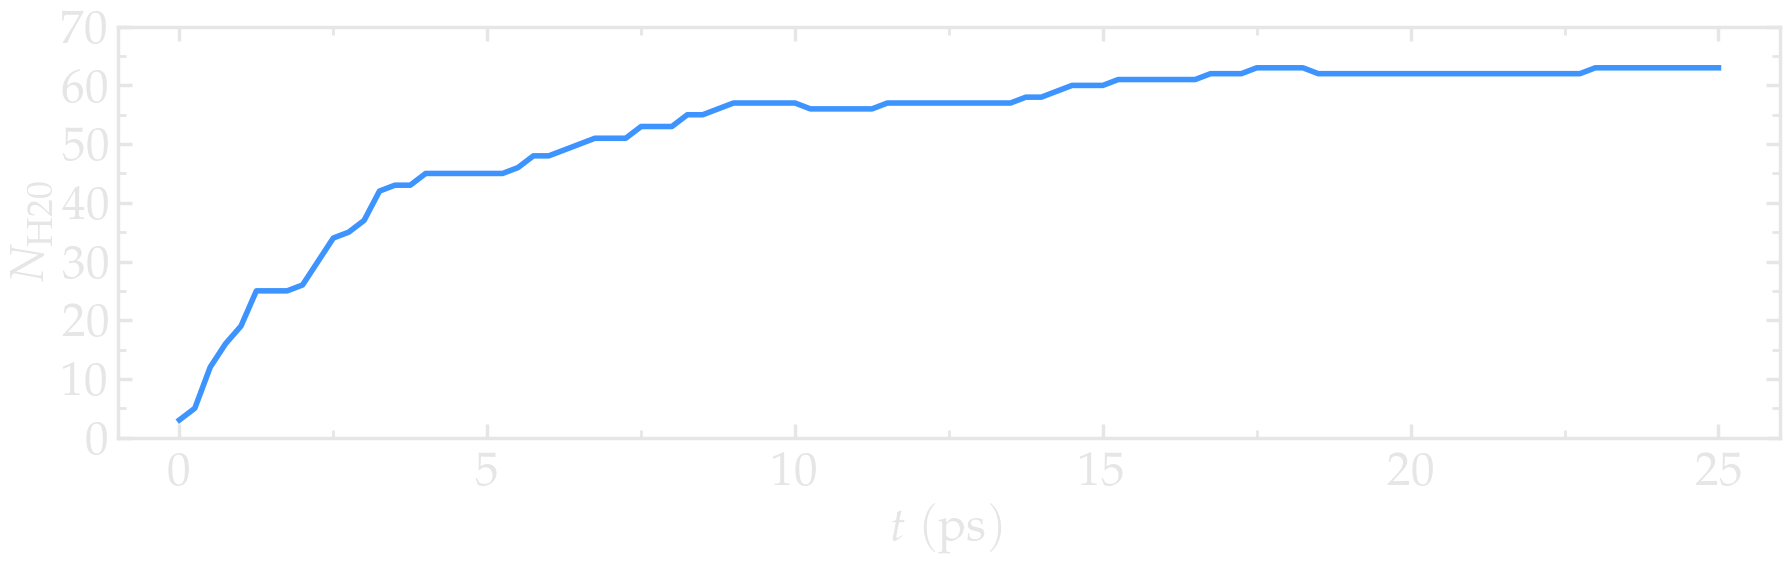

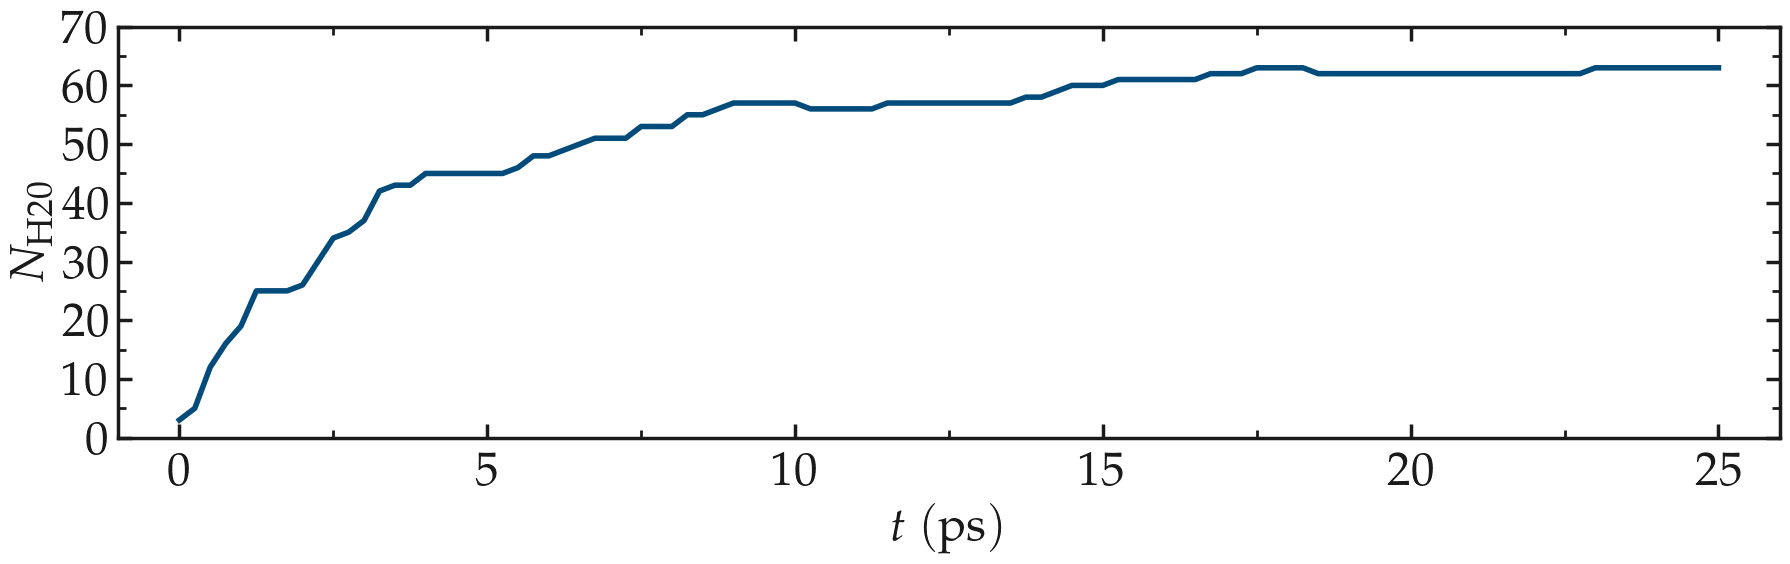

In [8]:
filename = "GCMC-number"

for dark_mode in [True, False]:

    colors = colors_dark if dark_mode else colors_light
    globals().update(colors)
        
    # Initialise figure
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,10), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_colone=1, n_line=2)
    # Panel a
    myplt.add_panel()
    myplt.add_plot(x = time, y = n0, type = "plot", linewidth_data = 3,
                marker = "-", data_color = color2, markersize = 12)
    myplt.complete_panel(ylabel = r'$N_\mathrm{H20}$',
                        xlabel = r'$t ~ \mathrm{(ps)}$', xpad = 10, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 25.1, 5), y_ticks=np.arange(0, 71, 10),
                        x_boundaries=(-1, 26), y_boundaries=(0, 70))
    # Print figure
    # myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = path_figures)